In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from keras.layers import add, Conv2D, Input
from keras.models import Model, load_model
from keras import backend as K
import os
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
def noise(img):
  svp = 0.5 
  amt = 1 
  out = np.copy(img)
  #Salt
  ns = np.ceil(amt*img.size * svp)
  pix = [np.random.randint(0,i,int(ns)) for i in img.shape] 
  out[pix] = 1
  #Pepper
  npp = np.ceil(amt*img.size * (1. - svp))
  pix = [np.random.randint(0,i,int(npp)) for i in img.shape] 
  out[pix] = 0
  return out

In [3]:
def img_prep(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
    hsv[...,2] = hsv[...,2]*0.2
    img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    img = noise(img)
    return img

In [4]:
path= "/home/rohit/Projects/Datasets"

In [5]:
os.chdir("/home/rohit/Projects/Datasets/images")

In [6]:
ab1= np.load('ab1.npy', fix_imports=True)
ab2= np.load('ab2.npy', fix_imports=True)
ab3= np.load('ab3.npy', fix_imports=True)

In [7]:
ab= np.concatenate((ab1,ab2,ab3), axis=0)

In [8]:
l= np.load('gray_scale.npy', fix_imports=True)

In [9]:
#l= l.reshape(25000,224,224,1)

In [10]:
l.shape

(25000, 224, 224)

In [11]:
X_ = l[0:10000,...]

In [12]:
#merged_images= cv2.merge(X_, ab1)
img = np.zeros(())

In [13]:
images = cv2.cvtColor(merged_images, cv2.COLOR_LAB2BGR)

NameError: name 'merged_images' is not defined

In [14]:
X = []
y = []
l=0
try:
for i in tqdm(os.listdir(path)):
    img = cv2.imread(os.path.join(path,i))
    img = cv2.resize(img, (224,224))
    y.append(img)
    X.append(img_prep(img))
    l = l+1
    if l>1500:
        break
X=np.array(X)
y=np.array(y)

IndentationError: expected an indented block (<ipython-input-14-0f77ff56436c>, line 5)

In [15]:
K.clear_session()
def InstantiateModel(in_):
    
    model_1 = Conv2D(16,(3,3), activation='relu',padding='same',strides=1)(in_)
    model_1 = Conv2D(32,(3,3), activation='relu',padding='same',strides=1)(model_1)
    model_1 = Conv2D(64,(2,2), activation='relu',padding='same',strides=1)(model_1)
    
    model_2 = Conv2D(32,(3,3), activation='relu',padding='same',strides=1)(in_)
    model_2 = Conv2D(64,(2,2), activation='relu',padding='same',strides=1)(model_2)
    
    model_2_0 = Conv2D(64,(2,2), activation='relu',padding='same',strides=1)(model_2)
    
    model_add = add([model_1,model_2,model_2_0])
    
    model_3 = Conv2D(64,(3,3), activation='relu',padding='same',strides=1)(model_add)
    model_3 = Conv2D(32,(3,3), activation='relu',padding='same',strides=1)(model_3)
    model_3 = Conv2D(16,(2,2), activation='relu',padding='same',strides=1)(model_3)
    
    model_3_1 = Conv2D(32,(3,3), activation='relu',padding='same',strides=1)(model_add)
    model_3_1 = Conv2D(16,(2,2), activation='relu',padding='same',strides=1)(model_3_1)
    
    model_3_2 = Conv2D(16,(2,2), activation='relu',padding='same',strides=1)(model_add)
    
    model_add_2 = add([model_3_1,model_3_2,model_3])
    
    model_4 = Conv2D(16,(3,3), activation='relu',padding='same',strides=1)(model_add_2)
    model_4_1 = Conv2D(16,(3,3), activation='relu',padding='same',strides=1)(model_add)
    #Extension
    model_add_3 = add([model_4_1,model_add_2,model_4])
    
    model_5 = Conv2D(16,(3,3), activation='relu',padding='same',strides=1)(model_add_3)
    model_5 = Conv2D(16,(2,2), activation='relu',padding='same',strides=1)(model_add_3)
    
    model_5 = Conv2D(3,(3,3), activation='relu',padding='same',strides=1)(model_5)
    
    return model_5

In [16]:
Input_Sample = Input(shape=(224, 224,3))
Output_ = InstantiateModel(Input_Sample)
model = Model(inputs=Input_Sample, outputs=Output_)

In [17]:
model.compile(optimizer="adam", loss='mean_squared_error', metrics = ['accuracy'])

In [18]:
def GI(X,y):
    for i in range(len(X)):
        X_ = X[i].reshape(1,224,224,3)
        y_ = y[i].reshape(1,224,224,3)
        yield (X_,y_)

In [19]:
Training = False

In [20]:
if Training:
    model.fit_generator(GI(X_,y),epochs=50,verbose=1,steps_per_epoch=100,shuffle=True)
    model.save("Low_light_enhancement_v1_224_X_224_1.h5")
else:
    model = load_model("/home/rohit/Projects/Low_light_enhancement_v1_224_X_224.h5")

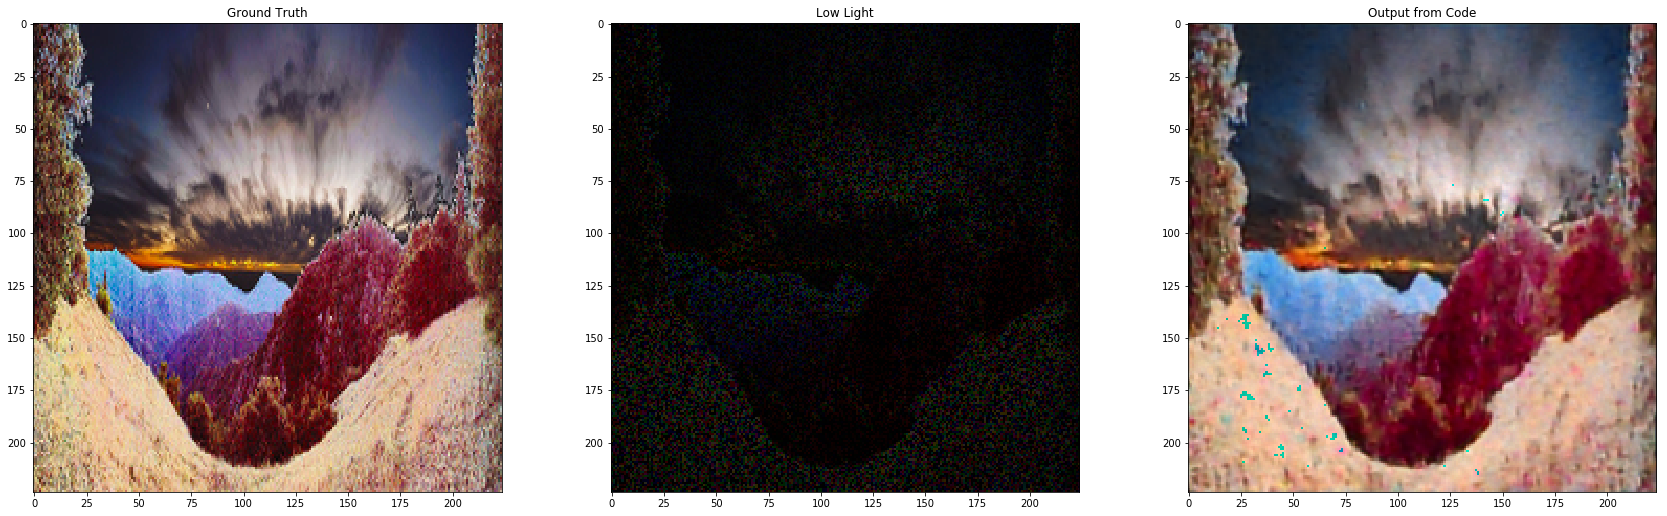

In [26]:
ind = np.random.randint(10001,25000)
Img = np.zeros((224,224,3))
Img[...,0] = l[ind]
Img[...,1] = ab[ind][...,0]
Img[...,2] = ab[ind][...,1]
Img = Img.astype("uint8")
Img = cv2.cvtColor(Img,cv2.COLOR_Lab2BGR)

plt.figure(figsize=(50,50))
plt.subplot(5,5,1)
plt.imshow(cv2.cvtColor(Img,cv2.COLOR_BGR2RGB))
plt.title("Ground Truth")
#plt.show()
#print(ind)

img_ = img_prep(Img)
plt.subplot(5,5,2)
plt.imshow(cv2.cvtColor(img_,cv2.COLOR_BGR2RGB))
plt.title("Low Light")
#plt.show()

img = model.predict(img_.reshape(1,224,224,3))
img = img.reshape(224,224,3)
img = img.astype("uint8")
plt.subplot(5,5,3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Output from Code")
plt.show()

In [ ]:
ind = np.random.randint(0,1500)
plt.figure(figsize=(30,30))
plt.subplot(5,5,1)
plt.imshow(cv2.cvtColor(y[ind],cv2.COLOR_BGR2RGB))
plt.title("Ground Truth")
#plt.show()
#print(ind)

img_ = img_prep(y[ind])
plt.subplot(5,5,2)
plt.imshow(cv2.cvtColor(img_,cv2.COLOR_BGR2RGB))
plt.title("Low Light")
#plt.show()

img = model.predict(img_.reshape(1,224,224,3))
img = img.reshape(224,224,3)
img = img.astype("uint8")
plt.subplot(5,5,3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Output from Code")
plt.show()